In [243]:
import pandas as pd # python에서의 엑셀과 같은 역할
import numpy as np # 계산을 편하게 해 주는 라이브러리
import matplotlib.pyplot as plt # 시각화
import seaborn as sns # 시각화

import matplotlib.ticker as ticker # 시각화
import matplotlib.dates as mdates # 시각화

import warnings
warnings.filterwarnings('ignore')

# ★ 실습 목적
    * Funnel data를 다루고
    * 그것을 직관적으로 파악할 수 있는 시각화

# _1. 데이터 불러오기

* 구글드라이브 연결

In [244]:
# 구글드라이브랑 연동하기 전에 실행시켜주기
#from google.colab import drive
#drive.mount('/content/drive')

In [245]:
%%time
df = pd.read_csv('C:/Users/minja/product_analysis/data/funnel_sample_final.csv')
df_base = df.copy()

Wall time: 14.4 s


## 1.1 data spec 확인

In [246]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1902435 entries, 0 to 1902434
Data columns (total 33 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   dates                  object 
 1   hours                  int64  
 2   age_layer              object 
 3   se_inflowed            int64  
 4   se_joined              float64
 5   se_cert_pv             float64
 6   se_cert_done           float64
 7   se_tax_calculation     float64
 8   se_tax_check           float64
 9   se_pay_pv              float64
 10  se_is_not_target       float64
 11  se_ref                 float64
 12  se_ref_kt              float64
 13  se_ref_lk              float64
 14  se_additional_info_pv  float64
 15  se_add_done            float64
 16  se_edit_done           float64
 17  se_save_done           float64
 18  et_inflowed            object 
 19  et_joined              object 
 20  et_cert_pv             object 
 21  et_cert_done           object 
 22  et_tax_calculation

In [247]:
# 소소한 팁 → 숫자 서식 중, 천 단위 컴마 찍기 // data type이 숫자가 아님. 출력할 때만 사용 권장
##  len 은  raw 수와 동일 
print(len(df_base))
print(f'{len(df_base)}')
print(f'{len(df_base):0,.0f}')

1902435
1902435
1,902,435


In [248]:
df_base.sample(5)

,dates,hours,age_layer,se_inflowed,se_joined,se_cert_pv,se_cert_done,se_tax_calculation,se_tax_check,se_pay_pv,...,et_tax_check,et_pay_pv,et_is_not_target,et_ref,et_ref_kt,et_ref_lk,et_additional_info_pv,et_add_done,et_edit_done,et_save_done
592036,2021-04-25,12,Unknown,1650857544857,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
654108,2021-04-27,17,Unknown,1651046460147,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
787590,2021-04-27,16,Unknown,1651045110631,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
802728,2021-04-23,22,Unknown,1650719312952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
815289,2021-04-25,14,Unknown,1650865535420,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# _2. data scheme

| idx | column | desc | type |
| --- | --- | --- | --- |
| 0 | dates | 날짜 | category | 
| 1 | hours | 시각 | category | 
| 2 | age_layer | 연령대 | category | 
| ------ | ------------------------------ | ------------------------------ | ------------------------------ |
| 3 | se_inflowed | session_유입 | 가입_이용 |
| 4 | se_joined | session_가입 |  가입_이용 |
| 5 | se_cert_pv | session_인증 |  가입_이용 |
| 6 | se_cert_done | session_인증완료 | 가입_이용 |
| 7 | se_tax_calculation | session_계산 |  가입_이용 |
| 8 | se_tax_check | session_조회 |  가입_이용 |
| 9 | se_pay_pv | session_결제화면 |  가입_이용 |
| 10 | se_is_not_target | session_서비스_비대상 | 가입 _ 이용 |
| 11 | se_ref | session_친구소개 | 친구소개 |
| 12 | se_ref_kt | session_친구소개_시도_1 | 친구소개 |
| 13 | se_ref_lk | session_친구소개_시도_2 | 친구소개 |
| 14 | se_addition_info_pv | session_추가정보입력안내 | 추가정보입력 |
| 15 | se_add_done | session_추가하기 | 추가정보입력 |
| 16 | se_edit_done | session_수정완료 | 추가정보입력 |
| 17 | se_save_done | session_저장완료 | 추가정보입력 |
| ------ | ------------------------------ | ------------------------------ |
| 18 | et_inflowed | event_time_유입 | 가입_이용 |
| 19 | et_joined | event_time_가입 | 가입_이용 |
| 20 | et_cert_pv | event_time_인증 | 가입_이용 |
| 21 | et_cert_done | event_time_인증완료 | 가입_이용 |
| 22 | et_tax_calculation | event_time_계산 | 가입_이용 |
| 23 | et_tax_check | event_time_조회 | 가입_이용 |
| 24 | et_pay_pv | event_time_결제화면 | 가입_이용 |
| 25 | et_is_not_target | event_time_서비스_비대상 | 가입_이용 |
| 26 | et_ref | event_time_친구소개 | 친구소개 |
| 27 | et_ref_kt | event_time_친구소개_시도_1 | 친구소개 |
| 28 | et_ref_lk | event_time_친구소개_시도_2 | 친구소개 |
| 29 | et_addition_info_pv | event_time_추가정보입력안내 | 추가정보입력 |
| 30 | et_add_done | event_time_추가하기 | 추가정보입력 |
| 31 | et_edit_done | event_time_수정완료 | 추가정보입력 |
| 32 | et_save_done | event_time_저장완료 | 추가정보입력 |

In [249]:
df_base['basic'] = 1 ##count 대신에 쓰기 위해 생성 

## 2.1 column 구분해 보기


In [250]:
df_base.head()

,dates,hours,age_layer,se_inflowed,se_joined,se_cert_pv,se_cert_done,se_tax_calculation,se_tax_check,se_pay_pv,...,et_pay_pv,et_is_not_target,et_ref,et_ref_kt,et_ref_lk,et_additional_info_pv,et_add_done,et_edit_done,et_save_done,basic
0,2021-04-29,1,Unknown,1651164079013,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2021-04-29,4,Unknown,1651175470863,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2021-04-29,3,Unknown,1651172275521,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2021-04-28,10,Unknown,1651107651854,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,2021-04-28,21,Unknown,1651149494804,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


### 2.1.1 category( df_category )

In [251]:
# 집계 기준이 되는 컬럼
# 'dates', 'hours', 'age_layer' :  날짜, 시간, 연령대
df_base[['dates', 'hours', 'age_layer']].head(2)

,dates,hours,age_layer
0,2021-04-29,1,Unknown
1,2021-04-29,4,Unknown


In [252]:
# Python은 0부터 넘버링
## 칼럼만 출력해서 리스트 형태로 만들기 
df_base.columns[0:2].tolist()

['dates', 'hours']

In [253]:
# 마지막 넘버 + 1로 마무리
df_base.columns[0:2+1].tolist()

['dates', 'hours', 'age_layer']

In [254]:
# 위의 [리스트] 결과를 새로운 변수로 선언 해 줌: category
category = df_base.columns[0:2+1].tolist()
category

['dates', 'hours', 'age_layer']

In [255]:
df_base[category].head(2)
# 첫 번째 셀 참고
# df_base[['dates', 'hours', 'age_layer']].head(2)★

,dates,hours,age_layer
0,2021-04-29,1,Unknown
1,2021-04-29,4,Unknown


In [256]:
df_base[category]

,dates,hours,age_layer
0,2021-04-29,1,Unknown
1,2021-04-29,4,Unknown
2,2021-04-29,3,Unknown
3,2021-04-28,10,Unknown
4,2021-04-28,21,Unknown
...,...,...,...
1902430,2021-04-23,18,Unknown
1902431,2021-04-28,11,30s
1902432,2021-04-23,23,Unknown
1902433,2021-04-26,9,Unknown


In [257]:
# 위 결과를 새로운 df로 선언( df_category )
df_category = df_base[category]
df_category.head(2)

,dates,hours,age_layer
0,2021-04-29,1,Unknown
1,2021-04-29,4,Unknown


### 2.1.2. 가입( df_signup )

In [258]:
# 가입부터 이용까지 컬럼 가져오기
df_base.columns[3:10+1].tolist()

['se_inflowed',
 'se_joined',
 'se_cert_pv',
 'se_cert_done',
 'se_tax_calculation',
 'se_tax_check',
 'se_pay_pv',
 'se_is_not_target']

In [259]:
# 가져온 컬럼 [리스트]를 새로운 변수로 선언( signup )
signup = df_base.columns[3:10+1].tolist()
signup

['se_inflowed',
 'se_joined',
 'se_cert_pv',
 'se_cert_done',
 'se_tax_calculation',
 'se_tax_check',
 'se_pay_pv',
 'se_is_not_target']

In [260]:
# 선언한 변수를 활용하여 df 샘플링
df_base[signup].head(5)

,se_inflowed,se_joined,se_cert_pv,se_cert_done,se_tax_calculation,se_tax_check,se_pay_pv,se_is_not_target
0,1651164079013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1651175470863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1651172275521,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1651107651854,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1651149494804,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [261]:
# category data 와 합치기: 합쳐진 리스트 = 리스트 + 리스트★
signup_v1 = category + signup
signup_v1

['dates',
 'hours',
 'age_layer',
 'se_inflowed',
 'se_joined',
 'se_cert_pv',
 'se_cert_done',
 'se_tax_calculation',
 'se_tax_check',
 'se_pay_pv',
 'se_is_not_target']

In [262]:
# ↑위의 컬럼들로 이루어진 새로운 df 생성
df_signup = df_base[signup_v1]
df_signup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1902435 entries, 0 to 1902434
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   dates               object 
 1   hours               int64  
 2   age_layer           object 
 3   se_inflowed         int64  
 4   se_joined           float64
 5   se_cert_pv          float64
 6   se_cert_done        float64
 7   se_tax_calculation  float64
 8   se_tax_check        float64
 9   se_pay_pv           float64
 10  se_is_not_target    float64
dtypes: float64(7), int64(2), object(2)
memory usage: 159.7+ MB


In [263]:
df_signup.head(2)

,dates,hours,age_layer,se_inflowed,se_joined,se_cert_pv,se_cert_done,se_tax_calculation,se_tax_check,se_pay_pv,se_is_not_target
0,2021-04-29,1,Unknown,1651164079013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-04-29,4,Unknown,1651175470863,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.1.3. 친구소개( df_ref )

In [264]:
# 1) 친구소개 화면으로 진입하는 2가지 경로 중 첫 번째: 결제 가능 회원 - df_ref_pay
# 'dates', 'age_layer', 'se_pay_pv', 'se_ref', 'se_ref_kt', 'se_ref_lk' ## se_pay_pv : 결제화면
df_ref_pay = df_base[['dates', 'age_layer', 'se_pay_pv', 'se_ref', 'se_ref_kt', 'se_ref_lk']]
df_ref_pay.head(2)

,dates,age_layer,se_pay_pv,se_ref,se_ref_kt,se_ref_lk
0,2021-04-29,Unknown,NaN,NaN,NaN,NaN
1,2021-04-29,Unknown,NaN,NaN,NaN,NaN


In [265]:
df_ref_pay['se_pay_pv'].notnull()

0          False
1          False
2          False
3          False
4          False
           ...  
1902430    False
1902431    False
1902432    False
1902433    False
1902434    False
Name: se_pay_pv, Length: 1902435, dtype: bool

In [266]:
# 친구소개 화면으로 진입하는 2가지 경로 중 첫 번째: 결제 가능 회원
# 결제가능 여부를 알아야 하기에, se_pay_pv에 진입한 회원들을 보기로 함( notnull() 사용 )
df_ref_pay = df_ref_pay[df_ref_pay['se_pay_pv'].notnull()]
df_ref_pay.head(2)

,dates,age_layer,se_pay_pv,se_ref,se_ref_kt,se_ref_lk
2392,2021-04-25,40s,1.650849e+12,NaN,NaN,NaN
4586,2021-04-23,50s,1.650713e+12,NaN,NaN,NaN


In [267]:
# 2) 친구소개 화면으로 진입하는 2가지 경로 중 첫 번째: 결제 불가능 회원 - df_ref_none
# 'dates', 'age_layer', 'se_is_not_target', 'se_ref', 'se_ref_kt', 'se_ref_lk' ## 'se_is_not_target' : (가입- 이용) 서비스 비대상
df_ref_none = df_base[['dates', 'age_layer', 'se_is_not_target', 'se_ref', 'se_ref_kt', 'se_ref_lk']]
df_ref_none.head(2)

,dates,age_layer,se_is_not_target,se_ref,se_ref_kt,se_ref_lk
0,2021-04-29,Unknown,NaN,NaN,NaN,NaN
1,2021-04-29,Unknown,NaN,NaN,NaN,NaN


In [268]:
# 친구소개 화면으로 진입하는 2가지 경로 중 첫 번째: 결제 불가능 회원
# 결제가능 여부를 알아야 하기에, se_is_not_target에 진입한 회원들을 보기로 함( notnull() 사용 )
df_ref_none = df_ref_none[df_ref_none['se_is_not_target'].notnull()]
df_ref_none.head(2)

,dates,age_layer,se_is_not_target,se_ref,se_ref_kt,se_ref_lk
863,2021-04-23,40s,1.650707e+12,NaN,NaN,NaN
993,2021-04-26,20s,1.650973e+12,NaN,NaN,NaN


# _3. 전환율

## 3.1. 가입 전환율

### 3.1.1 데이터 준비

* 데이터 준비 목적
    * 분석 하기 좋은 형태로의 변환
    * 현재는 funnel 단계마다 컬럼으로 표현 되어있는 데이터를
    * 단계를 나타내는 컬럼과, 각 단계의 이벤트 수를 나타내는 컬럼으로 집계하여 가공 할 예정( melt 활용 )

예를 들어, 아래의 형태를  

| dates | hours | age_layer | se_inflowed | se_joined |se_cert_pv | ...... |
| --- | --- | --- | --- | --- | --- | --- |
| 2021-04-28 | 15 | Unknown | 1650952870701 | NaN | NaN | NaN |
| 2021-04-28 | 15 | Unknown | 1650707891811 | 1650707891811 | 1650707891811 | NaN |


| dates | hours | age_layer | step | cnts | 
| --- | --- | --- | --- | --- |
| 2021-04-28 | 15 | Unknown | se_inflowed | 2 |
| 2021-04-28 | 15 | Unknown | se_joined | 1 |
| 2021-04-28 | 15 | Unknown | se_cert_pv | 1 |
| ... | ... | ... | ... | ... |

* 이와 같은 형태로 변경 할 예정
* why? 시각화 하기 좋은 형태!

In [269]:
# 데이터 확인( df_signup )
df_signup.head(2)

,dates,hours,age_layer,se_inflowed,se_joined,se_cert_pv,se_cert_done,se_tax_calculation,se_tax_check,se_pay_pv,se_is_not_target
0,2021-04-29,1,Unknown,1651164079013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-04-29,4,Unknown,1651175470863,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [270]:
## 이벤트 수 카운트 하기 위해 basic 칼럼 1로 생성하기
df_signup['basic'] = 1
df_signup.head(2)

,dates,hours,age_layer,se_inflowed,se_joined,se_cert_pv,se_cert_done,se_tax_calculation,se_tax_check,se_pay_pv,se_is_not_target,basic
0,2021-04-29,1,Unknown,1651164079013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2021-04-29,4,Unknown,1651175470863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [271]:
%%time
# 각 단계 별 이벤트 로그 총 개수 집계
# 'se_inflowed', 'se_joined', 'se_cert_pv', 'se_cert_done', 'se_tax_calculation', 'se_tax_check', 'se_pay_pv', 'se_is_not_target'
df_base.groupby(['basic'])['se_inflowed', 'se_joined', 'se_cert_pv', 'se_cert_done', 'se_tax_calculation', 'se_tax_check', 'se_pay_pv', 'se_is_not_target'].agg('nunique').reset_index()

## groupby()
## agg()
## reset_index()


Wall time: 3.83 s


,basic,se_inflowed,se_joined,se_cert_pv,se_cert_done,se_tax_calculation,se_tax_check,se_pay_pv,se_is_not_target
0,1,1899715,598172,304479,180434,148759,144110,34086,39573


In [272]:
# 컬럼 명만 가져와보기
df_signup.columns[3:-2+1]

Index(['se_inflowed', 'se_joined', 'se_cert_pv', 'se_cert_done',
       'se_tax_calculation', 'se_tax_check', 'se_pay_pv', 'se_is_not_target'],
      dtype='object')

In [273]:
# 단계별로 하나씩
# 좌변 → 우변 으로 읽는 것이 아닌, 우변 → 좌변 으로 읽기

temp_columns = df_signup.columns[3:-2+1].tolist()
df_signup_raw = df_signup.groupby(['basic'])[temp_columns].agg('nunique')
df_signup_raw = df_signup_raw.T # 가로열, 세로열 전환
df_signup_raw = df_signup_raw.reset_index()
df_signup_raw = df_signup_raw.rename(columns = {'index':'step', 1:'cnts'})

df_signup_raw

basic,step,cnts
0,se_inflowed,1899715
1,se_joined,598172
2,se_cert_pv,304479
3,se_cert_done,180434
4,se_tax_calculation,148759
5,se_tax_check,144110
6,se_pay_pv,34086
7,se_is_not_target,39573


In [274]:
# groupby 없이 해보기

In [275]:
temp_columns

['se_inflowed',
 'se_joined',
 'se_cert_pv',
 'se_cert_done',
 'se_tax_calculation',
 'se_tax_check',
 'se_pay_pv',
 'se_is_not_target']

In [276]:
## tdf_signup 데이터에서
## raw수를 append 이용해서 리스트 형태로 넣기 cnts 
## step이름 을 append 이용해서 리스트 형태로 넣기 df_list
## 두 리스트를 pd.DataFrame() 이용해서 데이터 셋으로 생성하기 temp_df
#### 요기서부터 다시 시작 ★★

In [277]:
%%time
cnts = []

for temp_col in temp_columns:
    temp_cnts = df_signup[temp_col].nunique() ## 가입경로 데이터에서 각각의 칼럼에 있는 세션의 고유 개수를 세어줌 
    print(temp_col, temp_cnts)
    cnts.append(temp_cnts) ## 세어준 값들을 리스트에 넣는다.

df_list = []
df_list.append(temp_columns)
df_list.append(cnts)

temp_df = pd.DataFrame(data = df_list, index = ['step', 'cnts']).T
temp_df

se_inflowed 1899715
se_joined 598172
se_cert_pv 304479
se_cert_done 180434
se_tax_calculation 148759
se_tax_check 144110
se_pay_pv 34086
se_is_not_target 39573
Wall time: 875 ms


,step,cnts
0,se_inflowed,1899715
1,se_joined,598172
2,se_cert_pv,304479
3,se_cert_done,180434
4,se_tax_calculation,148759
5,se_tax_check,144110
6,se_pay_pv,34086
7,se_is_not_target,39573


In [278]:
temp_df

,step,cnts
0,se_inflowed,1899715
1,se_joined,598172
2,se_cert_pv,304479
3,se_cert_done,180434
4,se_tax_calculation,148759
5,se_tax_check,144110
6,se_pay_pv,34086
7,se_is_not_target,39573


In [279]:
# 마지막 2개의 단계는 funnel이 아니라, 직전 단계의 결과를 케이스로 구분한 것: result 행 추가하여 통합된 결과로 만들기 위해
# 마지막 2개 직전까지만 잘라서
## se_pay_pv, se_is_not_target 제외하기
df_signup_raw.iloc[:5+1, :]

basic,step,cnts
0,se_inflowed,1899715
1,se_joined,598172
2,se_cert_pv,304479
3,se_cert_done,180434
4,se_tax_calculation,148759
5,se_tax_check,144110


In [280]:
# 마지막 2개 단계 합친 결과 -- result_check 
result_check = df_signup_raw.iloc[6,1] + df_signup_raw.iloc[7,1]
result_check


73659

In [281]:
# result 행으로만 구성된 임시 df 만들기
temp_df = pd.DataFrame(data = ['se_tax_result', result_check], index = ['step', 'cnts']).T
temp_df

,step,cnts
0,se_tax_result,73659


In [282]:
# result 행으로만 구성된 임시 df와 메인 df를 붙여주기
df_signup_raw_v1 = pd.concat([df_signup_raw.iloc[:5+1, :],temp_df], axis = 0, ignore_index = True)
df_signup_raw_v1

,step,cnts
0,se_inflowed,1899715
1,se_joined,598172
2,se_cert_pv,304479
3,se_cert_done,180434
4,se_tax_calculation,148759
5,se_tax_check,144110
6,se_tax_result,73659


In [283]:
# 붙여진 결과 확인
df_signup_raw_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   step    7 non-null      object
 1   cnts    7 non-null      object
dtypes: object(2)
memory usage: 240.0+ bytes


In [284]:
# data type 변경
df_signup_raw_v1['cnts'] = df_signup_raw_v1['cnts'].astype(int)
df_signup_raw_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   step    7 non-null      object
 1   cnts    7 non-null      int32 
dtypes: int32(1), object(1)
memory usage: 212.0+ bytes


### 3.1.2. total 가입 전환율

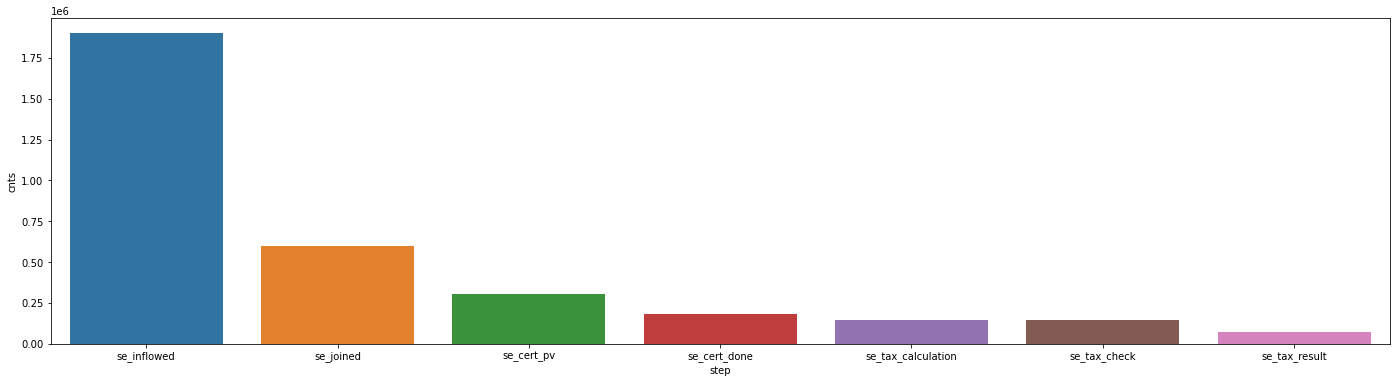

Wall time: 493 ms


In [285]:
%%time

# 이벤트 개수로 그려보기

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.barplot(
    data = df_signup_raw_v1,
    x = 'step',
    y = 'cnts'
)

plt.show()

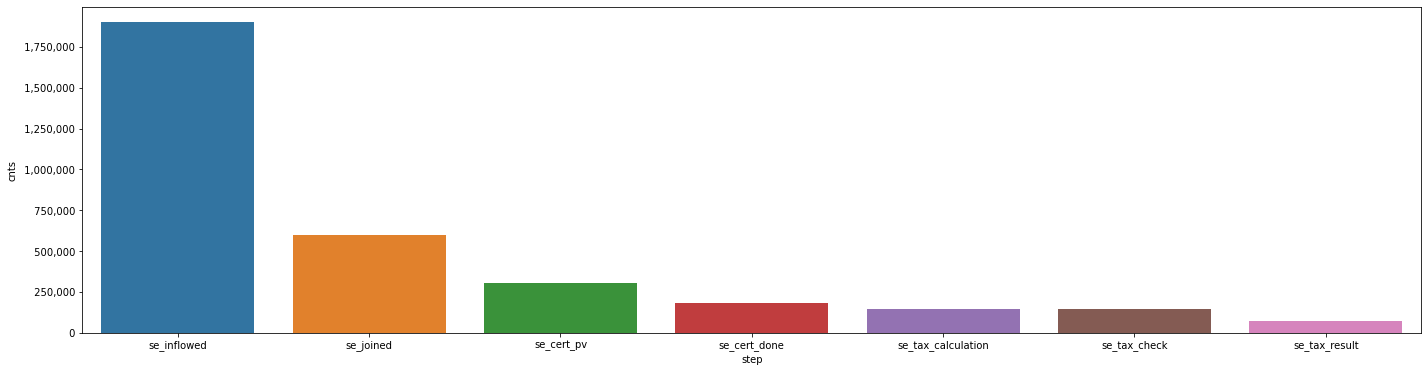

Wall time: 253 ms


In [286]:
%%time

# y축 서식 → ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x: 0,.0f}'))

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.barplot(
    data = df_signup_raw_v1,
    x = 'step',
    y = 'cnts'
)

ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x: 0,.0f}'))

plt.show()

In [287]:
# 조금 더 funnel스럽게 그려보기

In [288]:
# plotly library 사용
import plotly.express as px

In [289]:

fig = px.funnel(
    data_frame = df_signup_raw_v1,
    x = 'step',
    y = 'cnts',
    title = 'Funnel'
)

fig.show()

In [290]:
fig = px.funnel(
    data_frame = df_signup_raw_v1,
    y = 'step',
    x = 'cnts',
    title = 'Funnel'
)

fig.show()

In [291]:
# 누적 전환율 계산
df_signup_raw_v1

,step,cnts
0,se_inflowed,1899715
1,se_joined,598172
2,se_cert_pv,304479
3,se_cert_done,180434
4,se_tax_calculation,148759
5,se_tax_check,144110
6,se_tax_result,73659


In [292]:
%%time
# 분모 컬럼 생성 방법 세 가지
# 분모 컬럼 생성 방법 1. 가장 단순한 방법: 바로, 1899715를 복사하여 컬럼을 생성해 주기
df_signup_raw_v1['value_1'] = 1899715
df_signup_raw_v1['stacked_conversion'] = df_signup_raw_v1['cnts']/df_signup_raw_v1['value_1']

Wall time: 1.99 ms


In [293]:
df_signup_raw_v1

,step,cnts,value_1,stacked_conversion
0,se_inflowed,1899715,1899715,1.000000
1,se_joined,598172,1899715,0.314875
2,se_cert_pv,304479,1899715,0.160276
3,se_cert_done,180434,1899715,0.094980
4,se_tax_calculation,148759,1899715,0.078306
5,se_tax_check,144110,1899715,0.075859
6,se_tax_result,73659,1899715,0.038774


In [294]:
%%time
# 누적 전환율 계산
# 분모 컬럼 생성 방법 2. event log 집계 수 중, 가장 큰 값으로
# 누적 전환율이기에 분모로 들어갈 수는 당연히 가장 큰 수 일것이라는 ( 합리적인 ) 기대 == 전환율은 1을 넘어갈 수 없을 것이라는 기대

df_signup_raw_v1['basic'] = 1
df_signup_raw_v1['value_2'] = df_signup_raw_v1.groupby(['basic'])['cnts'].transform('max')

Wall time: 7.98 ms


In [295]:
df_signup_raw_v1

,step,cnts,value_1,stacked_conversion,basic,value_2
0,se_inflowed,1899715,1899715,1.000000,1,1899715
1,se_joined,598172,1899715,0.314875,1,1899715
2,se_cert_pv,304479,1899715,0.160276,1,1899715
3,se_cert_done,180434,1899715,0.094980,1,1899715
4,se_tax_calculation,148759,1899715,0.078306,1,1899715
5,se_tax_check,144110,1899715,0.075859,1,1899715
6,se_tax_result,73659,1899715,0.038774,1,1899715


In [296]:
# TMI
# transform 응용

In [297]:
df_signup_raw_v1['partition'] = ['A', 'A', 'A', 'A', 'B', 'B', 'B']
df_signup_raw_v1

,step,cnts,value_1,stacked_conversion,basic,value_2,partition
0,se_inflowed,1899715,1899715,1.000000,1,1899715,A
1,se_joined,598172,1899715,0.314875,1,1899715,A
2,se_cert_pv,304479,1899715,0.160276,1,1899715,A
3,se_cert_done,180434,1899715,0.094980,1,1899715,A
4,se_tax_calculation,148759,1899715,0.078306,1,1899715,B
5,se_tax_check,144110,1899715,0.075859,1,1899715,B
6,se_tax_result,73659,1899715,0.038774,1,1899715,B


In [298]:
df_signup_raw_v1['partition_sum'] = df_signup_raw_v1.groupby(['partition'])['cnts'].transform('sum')
df_signup_raw_v1['partition_min'] = df_signup_raw_v1.groupby(['partition'])['cnts'].transform('min')
df_signup_raw_v1['partition_max'] = df_signup_raw_v1.groupby(['partition'])['cnts'].transform('max')
df_signup_raw_v1['partition_mean'] = df_signup_raw_v1.groupby(['partition'])['cnts'].transform('mean')
df_signup_raw_v1

,step,cnts,value_1,stacked_conversion,basic,value_2,partition,partition_sum,partition_min,partition_max,partition_mean
0,se_inflowed,1899715,1899715,1.000000,1,1899715,A,2982800,180434,1899715,745700.0
1,se_joined,598172,1899715,0.314875,1,1899715,A,2982800,180434,1899715,745700.0
2,se_cert_pv,304479,1899715,0.160276,1,1899715,A,2982800,180434,1899715,745700.0
3,se_cert_done,180434,1899715,0.094980,1,1899715,A,2982800,180434,1899715,745700.0
4,se_tax_calculation,148759,1899715,0.078306,1,1899715,B,366528,73659,148759,122176.0
5,se_tax_check,144110,1899715,0.075859,1,1899715,B,366528,73659,148759,122176.0
6,se_tax_result,73659,1899715,0.038774,1,1899715,B,366528,73659,148759,122176.0


In [299]:
148759 + 144110 + 73659

366528

In [300]:
### TMI 끝
df_signup_raw_v1.drop(['partition', 'partition_sum', 'partition_max', 'partition_min', 'partition_mean'], axis = 1, inplace = True)

In [301]:
%%time
# 누적 전환율 계산
# 분모 컬럼 생성 방법 3. 위치로 찾기: 행렬 원소 위치처럼( 0, 0 )에서 시작
df_signup_raw_v1['value_3'] = df_signup_raw_v1.iloc[0, 1]

Wall time: 996 µs


In [302]:
df_signup_raw_v1

,step,cnts,value_1,stacked_conversion,basic,value_2,value_3
0,se_inflowed,1899715,1899715,1.000000,1,1899715,1899715
1,se_joined,598172,1899715,0.314875,1,1899715,1899715
2,se_cert_pv,304479,1899715,0.160276,1,1899715,1899715
3,se_cert_done,180434,1899715,0.094980,1,1899715,1899715
4,se_tax_calculation,148759,1899715,0.078306,1,1899715,1899715
5,se_tax_check,144110,1899715,0.075859,1,1899715,1899715
6,se_tax_result,73659,1899715,0.038774,1,1899715,1899715


In [303]:
df_signup_raw_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   step                7 non-null      object 
 1   cnts                7 non-null      int32  
 2   value_1             7 non-null      int64  
 3   stacked_conversion  7 non-null      float64
 4   basic               7 non-null      int64  
 5   value_2             7 non-null      int32  
 6   value_3             7 non-null      int32  
dtypes: float64(1), int32(3), int64(2), object(1)
memory usage: 436.0+ bytes


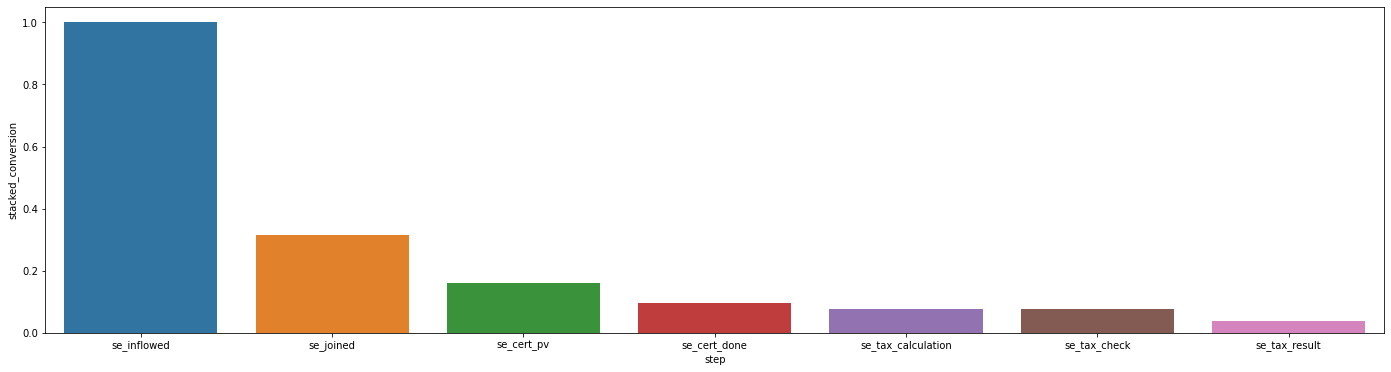

Wall time: 318 ms


In [304]:
%%time
# 누적전환율 시각화( bar )
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.barplot(
    data = df_signup_raw_v1,
    x = 'step',
    y = 'stacked_conversion'
)

plt.show()

In [305]:
### funnel스러운 차트 다시 한번

In [306]:

df_signup_raw_v1['stacked_conversion_v1'] = round(df_signup_raw_v1['stacked_conversion']*100, 1) ## 소수점 한자리까지 출력

fig = px.funnel(
    data_frame = df_signup_raw_v1,
    x = 'step',
    y = 'stacked_conversion' ##누적전환율
)

fig.show()

In [307]:
fig = px.funnel(
    data_frame = df_signup_raw_v1,
    y = 'step',
    x = 'stacked_conversion'
)

fig.show()

In [308]:
%%time
# 직전 전환율 구하기전 계산
df_signup_raw_v1['previous_cnts'] = df_signup_raw_v1['cnts'].shift(1)

Wall time: 1.99 ms


In [309]:
## 직전 전환율 =  카운트/전 카운트 
df_signup_raw_v1['previous_conversion'] = df_signup_raw_v1['cnts']/df_signup_raw_v1['previous_cnts']
df_signup_raw_v1

,step,cnts,value_1,stacked_conversion,basic,value_2,value_3,stacked_conversion_v1,previous_cnts,previous_conversion
0,se_inflowed,1899715,1899715,1.000000,1,1899715,1899715,100.0,NaN,NaN
1,se_joined,598172,1899715,0.314875,1,1899715,1899715,31.5,1899715.0,0.314875
2,se_cert_pv,304479,1899715,0.160276,1,1899715,1899715,16.0,598172.0,0.509016
3,se_cert_done,180434,1899715,0.094980,1,1899715,1899715,9.5,304479.0,0.592599
4,se_tax_calculation,148759,1899715,0.078306,1,1899715,1899715,7.8,180434.0,0.824451
5,se_tax_check,144110,1899715,0.075859,1,1899715,1899715,7.6,148759.0,0.968748
6,se_tax_result,73659,1899715,0.038774,1,1899715,1899715,3.9,144110.0,0.511130


In [310]:
df_signup_raw_v1

,step,cnts,value_1,stacked_conversion,basic,value_2,value_3,stacked_conversion_v1,previous_cnts,previous_conversion
0,se_inflowed,1899715,1899715,1.000000,1,1899715,1899715,100.0,NaN,NaN
1,se_joined,598172,1899715,0.314875,1,1899715,1899715,31.5,1899715.0,0.314875
2,se_cert_pv,304479,1899715,0.160276,1,1899715,1899715,16.0,598172.0,0.509016
3,se_cert_done,180434,1899715,0.094980,1,1899715,1899715,9.5,304479.0,0.592599
4,se_tax_calculation,148759,1899715,0.078306,1,1899715,1899715,7.8,180434.0,0.824451
5,se_tax_check,144110,1899715,0.075859,1,1899715,1899715,7.6,148759.0,0.968748
6,se_tax_result,73659,1899715,0.038774,1,1899715,1899715,3.9,144110.0,0.511130


In [311]:
# 불필요한 컬럼 지우기
df_signup_raw_v1.drop(['value_1', 'value_2','value_3'], axis = 1, inplace = True)

In [312]:
df_signup_raw_v1

,step,cnts,stacked_conversion,basic,value_3,stacked_conversion_v1,previous_cnts,previous_conversion
0,se_inflowed,1899715,1.000000,1,1899715,100.0,NaN,NaN
1,se_joined,598172,0.314875,1,1899715,31.5,1899715.0,0.314875
2,se_cert_pv,304479,0.160276,1,1899715,16.0,598172.0,0.509016
3,se_cert_done,180434,0.094980,1,1899715,9.5,304479.0,0.592599
4,se_tax_calculation,148759,0.078306,1,1899715,7.8,180434.0,0.824451
5,se_tax_check,144110,0.075859,1,1899715,7.6,148759.0,0.968748
6,se_tax_result,73659,0.038774,1,1899715,3.9,144110.0,0.511130


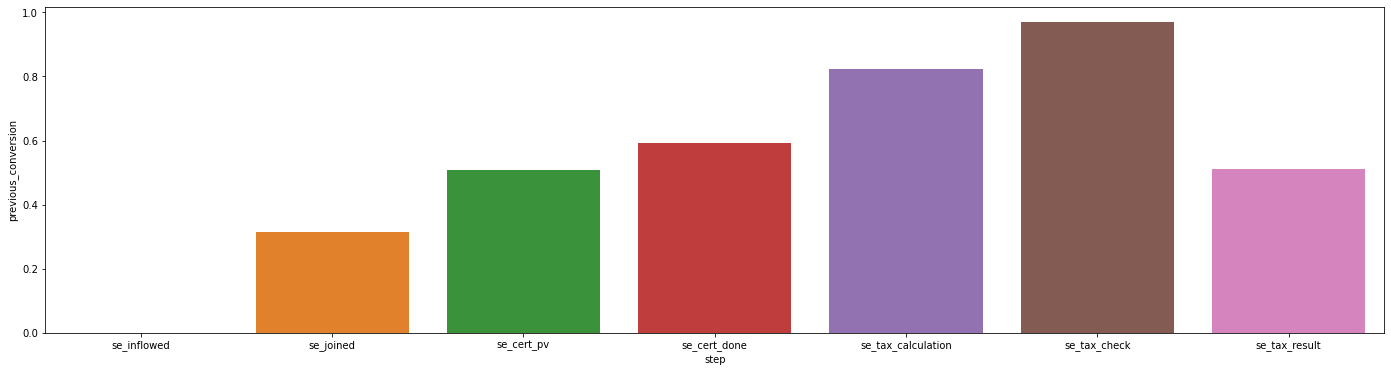

In [313]:
# 직전 전환율 그리기
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.barplot(
    data = df_signup_raw_v1,
    x = 'step',
    y = 'previous_conversion'
)

plt.show()

## step마다 직전 전환율이 상승하고 있다.


In [314]:
# plotly
## 직전전환율 한번 더 보기 
df_signup_raw_v1['previous_conversion_v1'] = round(df_signup_raw_v1['previous_conversion']*100, 1)
fig = px.funnel(
    data_frame = df_signup_raw_v1,
    x = 'step',
    y = 'previous_conversion_v1'
)

fig.show()

## 직전 전환율 앞에부분을 더개선하면 더많은 유저를 진입시킬수있겠다

### 3.1.3. 가입전환율 드릴다운

#### 데이터 준비

In [315]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1902435 entries, 0 to 1902434
Data columns (total 34 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   dates                  object 
 1   hours                  int64  
 2   age_layer              object 
 3   se_inflowed            int64  
 4   se_joined              float64
 5   se_cert_pv             float64
 6   se_cert_done           float64
 7   se_tax_calculation     float64
 8   se_tax_check           float64
 9   se_pay_pv              float64
 10  se_is_not_target       float64
 11  se_ref                 float64
 12  se_ref_kt              float64
 13  se_ref_lk              float64
 14  se_additional_info_pv  float64
 15  se_add_done            float64
 16  se_edit_done           float64
 17  se_save_done           float64
 18  et_inflowed            object 
 19  et_joined              object 
 20  et_cert_pv             object 
 21  et_cert_done           object 
 22  et_tax_calculation

In [316]:
df_base.columns[3:9].tolist()

['se_inflowed',
 'se_joined',
 'se_cert_pv',
 'se_cert_done',
 'se_tax_calculation',
 'se_tax_check']

In [317]:

df_base.groupby(['age_layer'])[df_base.columns[3:10+1]].agg('nunique')  ## reset_index()를 하지 않으니까 안정적이지 않다.

,se_inflowed,se_joined,se_cert_pv,se_cert_done,se_tax_calculation,se_tax_check,se_pay_pv,se_is_not_target
age_layer,,,,,,,,
20s,109880,97104,59990,52526,42020,39948,9806,6002
30s,91655,77979,60197,52864,43915,42988,10385,11224
40s,106767,83084,69152,58306,48946,47815,10610,16855
50s,47311,26144,18445,13504,11108,10706,2630,4370
60s,12017,6196,4804,3147,2687,2569,638,1072
Unknown,1532657,308035,92206,314,269,264,68,102


In [318]:
%%time
# 드릴다운 항목( age_layer ) 기준으로 가입 funnel groupby
## 앞에서 봤던 직전 전환율을 연령대별로 나누어서 보겠다

df_base.groupby(['age_layer'])[df_base.columns[3:10+1]].agg('nunique').reset_index()

Wall time: 3.06 s


,age_layer,se_inflowed,se_joined,se_cert_pv,se_cert_done,se_tax_calculation,se_tax_check,se_pay_pv,se_is_not_target
0,20s,109880,97104,59990,52526,42020,39948,9806,6002
1,30s,91655,77979,60197,52864,43915,42988,10385,11224
2,40s,106767,83084,69152,58306,48946,47815,10610,16855
3,50s,47311,26144,18445,13504,11108,10706,2630,4370
4,60s,12017,6196,4804,3147,2687,2569,638,1072
5,Unknown,1532657,308035,92206,314,269,264,68,102


In [319]:
%%time
# 위 결과를 새로운 df로 선언
df_signup_age = df_base.groupby(['age_layer'])[df_base.columns[3:10+1]].agg('nunique').reset_index()

Wall time: 3.03 s


In [320]:
df_signup_age

,age_layer,se_inflowed,se_joined,se_cert_pv,se_cert_done,se_tax_calculation,se_tax_check,se_pay_pv,se_is_not_target
0,20s,109880,97104,59990,52526,42020,39948,9806,6002
1,30s,91655,77979,60197,52864,43915,42988,10385,11224
2,40s,106767,83084,69152,58306,48946,47815,10610,16855
3,50s,47311,26144,18445,13504,11108,10706,2630,4370
4,60s,12017,6196,4804,3147,2687,2569,638,1072
5,Unknown,1532657,308035,92206,314,269,264,68,102


In [321]:
# Unknown row 없애기
df_signup_age = df_signup_age.iloc[:4+1, :-1]
df_signup_age

,age_layer,se_inflowed,se_joined,se_cert_pv,se_cert_done,se_tax_calculation,se_tax_check,se_pay_pv
0,20s,109880,97104,59990,52526,42020,39948,9806
1,30s,91655,77979,60197,52864,43915,42988,10385
2,40s,106767,83084,69152,58306,48946,47815,10610
3,50s,47311,26144,18445,13504,11108,10706,2630
4,60s,12017,6196,4804,3147,2687,2569,638


In [322]:
# 이제, age_layer는 그대로 두고, 그 이하의 컬럼들( se... )을 row로 전환 해 주려 함
# Unpivot

In [323]:
# melt method 활용
df_signup_age.melt?  ##melt 메서드 도움말보기

SyntaxError: invalid syntax (Temp/ipykernel_9072/476618649.py, line 2)

In [ ]:
## 연령대별 단계별 카운트
 
df_signup_age_v1 = df_signup_age.melt(
    id_vars = ['age_layer'], ## 무엇을 고정시킬것인가 age_layer
    value_vars = df_signup_age.columns[1:].tolist(), ## 무엇을 값으로 만들것인가
    var_name = 'step', ## 변수이름 
    value_name = 'cnts' ## 값 이름
)

df_signup_age_v1

In [ ]:
## 이벤트 볼륨으로 시각화( bar )

%%time

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.barplot(
    data = df_signup_age_v1,
    x = 'step',
    y = 'cnts',
    hue = 'age_layer' ## 연령대마다 나오기
)

plt.show()

In [ ]:
## 이벤트 볼륨으로 시각화( line )
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.lineplot(
    data = df_signup_age_v1,
    x = 'step',
    y = 'cnts',
    hue = 'age_layer',
    marker = 'o'
)

plt.show()

#### 누적전환율

In [ ]:
%%time
## 연령대로 나누기 전, 20s만 시범적으로 나눠서 보기

temp_20 = df_signup_age_v1[df_signup_age_v1['age_layer'] == '20s']


In [ ]:
temp_20

In [ ]:
temp_20['first_value'] = temp_20.iloc[0, 2]
temp_20['stacked_conversion'] = temp_20['cnts']/temp_20['first_value']    ## 20대 누적전환율
temp_20['stacked_conversion_v1'] = round(temp_20['stacked_conversion']*100, 1) ## 20대 직전전환율
temp_20

In [ ]:
temp_20['previous_cnts'] = temp_20['cnts'].shift(1) ## cnts의 값을 한칸씩 내려서 할당
temp_20['previous_conversion'] = temp_20['cnts']/temp_20['previous_cnts']
temp_20['previous_conversion_v1'] = round(temp_20['previous_conversion']*100, 1)
temp_20

In [ ]:
## previous_conversion 검증 
97104	/109880.0	

In [ ]:
## for문 준비: age_layer unique
sorted(df_signup_age_v1['age_layer'].unique().tolist()) ## 20대부터 60대까지 고유값만 만들기

In [ ]:
%%time
df_conversion = pd.DataFrame() ## for 문 에서 바꿔주긴 하지만 담아주진 않아서 데이터 프레임 형태로 만들어주기

for temp_age in sorted(df_signup_age_v1['age_layer'].unique().tolist()):

    # 해당 연령대만의 df 만들어 주기
    temp_df = df_signup_age_v1[df_signup_age_v1['age_layer'] == temp_age] ## 특정 연령대

    # 해당 연령대에서의 누적 전환율
    temp_df['first_value'] = temp_df.iloc[0, 2]
    temp_df['stacked_conversion'] = temp_df['cnts']/temp_df['first_value']
    temp_df['stacked_conversion_v1'] = round(temp_df['stacked_conversion']*100, 1)

    # 해당 연령대에서의 직전 전환율
    temp_df['previous_cnts'] = temp_df['cnts'].shift(1)
    temp_df['previous_conversion'] = temp_df['cnts']/temp_df['previous_cnts']
    temp_df['previous_conversion_v1'] = round(temp_df['previous_conversion']*100, 1)

    df_conversion = pd.concat([df_conversion, temp_df], axis = 0, ignore_index = True)

In [ ]:
df_conversion

In [ ]:
%%time
# 누적 전환율 그려보기( line )

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.lineplot(
    data = df_conversion,
    x = 'step',
    y = 'stacked_conversion_v1',
    hue = 'age_layer',
    marker = 'o'
)

plt.show()

In [ ]:
%%time
# 이벤트 볼륨과의 직접 비교를 위해 동시에 2개 그려보기

fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (24, 10))

sns.lineplot(
    data = df_conversion,
    x = 'step',
    y = 'stacked_conversion_v1',
    hue = 'age_layer',
    marker = 'o',
    ax = ax[0]
).set_title(f'conversion_ratio', fontsize = 30)

sns.lineplot(
    data = df_signup_age_v1,
    x = 'step',
    y = 'cnts',
    hue = 'age_layer',
    marker = 'o',
    ax = ax[1]
).set_title(f'conversion_cnts', fontsize = 30)

plt.tight_layout()
plt.show()

In [ ]:
# plotly
fig = px.funnel(
    data_frame = df_conversion,
    x = 'step',
    y = 'stacked_conversion_v1',
    color = 'age_layer',
    title = 'Funnel'
)

fig.show()

In [ ]:
# plotly
fig = px.funnel(
    data_frame = df_conversion,
    y = 'step',
    x = 'stacked_conversion_v1',
    color = 'age_layer',
    title = 'Funnel'
)

fig.show()

#### 직전 전환율

In [ ]:
%%time
## 직전전환율
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 10))

sns.lineplot(
    data = df_conversion,
    x = 'step',
    y = 'previous_conversion_v1',
    hue = 'age_layer',
    marker = 'P' # 변곡점 점 표시
)

plt.show()

In [ ]:
# plotly
fig = px.funnel(
    data_frame = df_conversion,
    x = 'step',
    y = 'previous_conversion_v1',
    color = 'age_layer'
)

fig.show()

In [ ]:
# plotly
fig = px.funnel(
    data_frame = df_conversion,
    y = 'step',
    x = 'previous_conversion_v1',
    color = 'age_layer'
)

fig.show()

## 3.2. 친구소개 (pass 하고 체류시간으로)

### 3.2.1. 데이터 준비

In [ ]:
# 친구소개 화면으로 진입하는 두 가지 경로
# 한 가지는 결제 회원
# 다른 한 가지는 서비스 대상이 아닌 경우

In [ ]:
# case 1. 결제 회원 df info
df_ref_pay.info()

In [ ]:
# case 2. 서비스 비대상 회원 df info
df_ref_none.info()

In [ ]:
df_ref_pay.head()

In [ ]:
df_ref_none.head()

In [ ]:
# 각각의 df 내 dates와 age_layer를 기준삼아 session_id를 집계하여 재 선언
df_ref_pay = df_ref_pay.groupby(['dates', 'age_layer'])[df_ref_pay.columns[2:].tolist()].agg('nunique').reset_index()
df_ref_none = df_ref_none.groupby(['dates', 'age_layer'])[df_ref_none.columns[2:].tolist()].agg('nunique').reset_index()

In [ ]:
df_ref_pay.head(2)

In [ ]:
df_ref_none.head(2)

In [ ]:
# 위의 두 가지 df를 dates와 age_layer를 기준으로 합쳐주기: merge 활용
df_ref = df_ref_pay.merge(df_ref_none, how = 'inner', on = ['dates', 'age_layer'], copy = False)
df_ref.head(2)

In [ ]:
# column 성격에 따라 합쳐주기
df_ref['01_ref_intro'] = df_ref['se_pay_pv'] + df_ref['se_is_not_target']
df_ref['02_ref_entered'] = df_ref['se_ref_x'] + df_ref['se_ref_y']
df_ref['03_ref_tried'] = df_ref['se_ref_kt_x'] + df_ref['se_ref_lk_x'] + df_ref['se_ref_kt_y'] + df_ref['se_ref_lk_y']

df_ref.head(2)

In [ ]:
# 필요한 컬럼만 가져오기
df_ref = df_ref[['dates', 'age_layer', '01_ref_intro', '02_ref_entered', '03_ref_tried']]
df_ref.head(2)

In [ ]:
# melt 활용
df_ref.melt(
    id_vars = ['dates', 'age_layer'],
    value_vars = df_ref.columns[2:].tolist(),
    var_name = 'step',
    value_name = 'cnts'
)

In [ ]:
# melt 결과를 새로운 df로 선언하기
df_ref_raws = df_ref.melt(
    id_vars = ['dates', 'age_layer'],
    value_vars = df_ref.columns[2:].tolist(),
    var_name = 'step',
    value_name = 'cnts'
)

In [ ]:
df_ref_raws.head(2)

### 3.2.2. total 친구소개

In [ ]:
# step을 기준으로 집계
df_ref_raws.groupby(['step'])['cnts'].agg('sum').reset_index()

In [ ]:
# 새로운 df로 선언하고 전환율 계산하기
df_ref_step = df_ref_raws.groupby(['step'])['cnts'].agg('sum').reset_index()
df_ref_step['first_value'] = df_ref_step.iloc[0, 1]
df_ref_step['stacked_conversion'] = round(df_ref_step['cnts']*100/df_ref_step['first_value'], 1)
df_ref_step['previous_cnts'] = df_ref_step['cnts'].shift(1)
df_ref_step['previous_conversion'] = round(df_ref_step['cnts']*100/df_ref_step['previous_cnts'], 1)
df_ref_step

In [ ]:
%%time
# 누적 전환율( bar )
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.barplot(
    data = df_ref_step,
    x = 'step',
    y = 'stacked_conversion'
)

plt.show()

In [ ]:
%%time
# 직전 전환율
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.barplot(
    data = df_ref_step,
    x = 'step',
    y = 'previous_conversion'
)

plt.show()

In [ ]:
# plotly
fig = px.funnel(
    data_frame = df_ref_step,
    x = 'step',
    y = 'stacked_conversion'
)

fig.show()

In [ ]:
# plotly
fig = px.funnel(
    data_frame = df_ref_step,
    x = 'step',
    y = 'previous_conversion'
)

fig.show()

### 3.2.2. 친구소개 드릴다운

In [ ]:
# total ref 만들기 직전 df_ref_raws
df_ref_raws.info()

In [ ]:
# age를 기준으로 집계( df_ref_raws_age )
df_ref_age = df_ref_raws.groupby(['age_layer', 'step'])['cnts'].agg('sum').reset_index()
df_ref_age

In [ ]:
# 전환율 계산에 필요한 컬럼들 만들기

# 누적전환율
df_ref_age['first_value'] = df_ref_age.groupby(['age_layer'])['cnts'].transform('max')
df_ref_age['stacked_conversion'] = round(df_ref_age['cnts']*100/df_ref_age['first_value'], 1)

# 직전전환율
df_ref_age['previous_cnts'] = np.where(df_ref_age['step'] == '01_ref_intro', np.nan, df_ref_age['cnts'].shift(1))
df_ref_age['previous_conversion'] = round(df_ref_age['cnts']*100/df_ref_age['previous_cnts'], 1)

# age_layer Unknown 제거
df_ref_age = df_ref_age[df_ref_age['age_layer'] != 'Unknown']
df_ref_age

In [ ]:
%%time
# 누적전환율
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.lineplot(
    data = df_ref_age,
    x = 'step',
    y = 'stacked_conversion',
    hue = 'age_layer'
)

plt.show()

In [ ]:
%%time
# 직전전환율
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.lineplot(
    data = df_ref_age,
    x = 'step',
    y = 'previous_conversion',
    hue = 'age_layer'
)

plt.show()

# _4. 체류시간

## 4.1. 라이브러리 불러오기 및 data type 변경

In [ ]:
# date 관련 library
from datetime import *

In [ ]:
df_base.info() ## 18-32 이벤트 타임을 사용할거임

***★ 체류시간에 대해 염두에 두어야 할 사항***

다음 단계로 진입한 회원만 시간이 잡히므로,  
다음 단계로 진입하지 않고 이탈 한 사람들은 얼마나 머물다가 이탈했는 지 모른다  

다만, 화면 체류시간 분포를 가늠하면서  
어떠한 이슈가 있는 지 추정해보고 가설세워 AB테스트로 검증하는 작업 반복

In [ ]:
# 체류시간과 관련된 컬럼 가져오기
df_base.columns[18:32+1].tolist()

In [ ]:
# category column과 합칠 예정
category

In [ ]:
et_columns = category + df_base.columns[18:32+1].tolist()
et_columns ## 이벤트 칼럼 리스트로 만들기

In [ ]:
# 체류시간 df 완성
df_et = df_base[et_columns]
df_et.head()

In [ ]:
df_et.info() ## 시간 칼럼을 다룰 건데 대부분 칼럼이 오브젝트형이다.오브젝트는 연산이 불가능. 문자열과 같음

In [ ]:
# object type에 해당하는 column들 확인
df_et.columns[3:].tolist()

In [ ]:
df_et.head(2)

In [ ]:
%%time
# data type 변경
# object == string == varchar == char 등, 연산이 불가능한 data type 이므로,
# 연산이 가능한 data type → 그 중, 우리의 목적인 시간 연산이 가능한 datetime으로 변경

for temp_et in df_et.columns[3:].tolist():
    print(temp_et)
    df_et[temp_et] = pd.to_datetime(df_et[temp_et], format = '%Y-%m-%d %H:%M:%S') ## 문자열을 DATETIME으로 바꾸기, 연산하기 위해

print('\n\ndata type conversion is completed\n↓ here is info\n\n')
df_et.info()

## 4.2. 체류시간 산출

In [ ]:
# 첫 번째 체류시간 구해보기
# s와 ms 차이
# df_et['stay_inflowed'] = (df_et['et_joined'] - df_et['et_inflowed']).astype('timedelta64[s]')
df_et['stay_inflowed'] = (df_et['et_joined'] - df_et['et_inflowed']).astype('timedelta64[ms]')/1000 ## 유입이 된시간 - 다음 유입이 있었던시간 = 머물렀던 시간( 체류 시간 )

df_et[['et_inflowed', 'et_joined', 'stay_inflowed']].sample(5)

In [ ]:
# 나머지 채류시간도 구해보기
df_et['stay_joined'] = (df_et['et_cert_pv'] - df_et['et_joined']).astype('timedelta64[ms]')/1000
df_et['stay_cert'] = (df_et['et_cert_done'] - df_et['et_cert_pv']).astype('timedelta64[ms]')/1000

In [ ]:
# 체류시간 샘플
df_et[['dates', 'hours', 'age_layer', 'stay_inflowed', 'stay_joined', 'stay_cert']].sample(5)

In [ ]:
# 체류시간 샘플을 새로운 df로 선언 (DF_STAY)
df_stay = df_et[['dates', 'hours', 'age_layer', 'stay_inflowed', 'stay_joined', 'stay_cert']]
df_stay

In [ ]:
# 체류시간이 측정된 건들만 남기기( df_stay_inflowed // notnull() )
df_stay= df_stay[df_stay['stay_inflowed'].notnull()]  ## 유입이 있는것만 남기기
df_stay.info()

## 4.3. 체류 시간 분포 확인

### 4.3.1. 유입 화면 ( 수업 여기 까지 함 )

In [ ]:
df_stay.head(2)

In [ ]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))
sns.distplot(df_stay_inflowed['stay_inflowed'], hist = False) ##distplot : 수치 분포 나타내기
plt.show()

In [ ]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.distplot(
    np.log10(df_stay_inflowed['stay_inflowed']), ## x축 : 10의 제곱을 나타냄
    hist = False
)


plt.show()

In [ ]:
%%time
# hist = True

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.distplot(
    np.log10(df_stay_inflowed['stay_inflowed']),
    hist = True
)

plt.xticks(fontsize = 20)
plt.show()

In [ ]:
%%time
# 5초, 10초 등등에 선 그어보기

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.distplot(
    np.log10(df_stay_inflowed['stay_inflowed']),
    hist = False
)

plt.axvline(np.log10(5), color = 'darkred', linestyle = '--', linewidth = 0.5) # 5초 선
plt.axvline(np.log10(10), color = 'darkred', linestyle = '--', linewidth = 0.5) # 10초 선 
plt.axvline(np.log10(15), color = 'darkred', linestyle = '--', linewidth = 0.5) # 15초 선 
plt.axvline(np.log10(20), color = 'darkred', linestyle = '--', linewidth = 0.5) # 20초 선

plt.xticks(fontsize = 20)
plt.show()

In [ ]:
%%time
# 연령대 구분 추가(hist = True)
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.distplot( np.log10(df_stay_inflowed[df_stay_inflowed['age_layer'] == '20s']['stay_inflowed']), hist = True, label = '20s' )
sns.distplot( np.log10(df_stay_inflowed[df_stay_inflowed['age_layer'] == '30s']['stay_inflowed']), hist = True, label = '30s' )
sns.distplot( np.log10(df_stay_inflowed[df_stay_inflowed['age_layer'] == '40s']['stay_inflowed']), hist = True, label = '40s' )
sns.distplot( np.log10(df_stay_inflowed[df_stay_inflowed['age_layer'] == '50s']['stay_inflowed']), hist = True, label = '50s' )
sns.distplot( np.log10(df_stay_inflowed[df_stay_inflowed['age_layer'] == '60s']['stay_inflowed']), hist = True, label = '60s' )

plt.axvline(np.log10(5), color = 'darkred', linestyle = '--', linewidth = 0.5) #1
plt.axvline(np.log10(10), color = 'darkred', linestyle = '--', linewidth = 0.5) #2
plt.axvline(np.log10(15), color = 'darkred', linestyle = '--', linewidth = 0.5) #3
plt.axvline(np.log10(20), color = 'darkred', linestyle = '--', linewidth = 0.5) #4

plt.legend() ##

plt.xticks(fontsize = 20)
plt.show()

## 20대: 가장 왼쪽
## 60대 : 가장 오른쪽 
#### 연령대에 따라 체류시간이 비례함을 보이고 있다. 


In [ ]:
%%time
# 선만 보이기( hist = False )
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 6))

sns.distplot( np.log10(df_stay_inflowed[df_stay_inflowed['age_layer'] == '20s']['stay_inflowed']), hist = False, label = '20s' )
sns.distplot( np.log10(df_stay_inflowed[df_stay_inflowed['age_layer'] == '30s']['stay_inflowed']), hist = False, label = '30s' )
sns.distplot( np.log10(df_stay_inflowed[df_stay_inflowed['age_layer'] == '40s']['stay_inflowed']), hist = False, label = '40s' )
sns.distplot( np.log10(df_stay_inflowed[df_stay_inflowed['age_layer'] == '50s']['stay_inflowed']), hist = False, label = '50s' )
sns.distplot( np.log10(df_stay_inflowed[df_stay_inflowed['age_layer'] == '60s']['stay_inflowed']), hist = False, label = '60s' )

plt.axvline(np.log10(5), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(10), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(15), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(20), color = 'darkred', linestyle = '--', linewidth = 0.5)

plt.legend()

plt.xticks(fontsize = 20)
plt.show()



#### 유입화면 체류시간 daily trend

In [ ]:
df_stay_inflowed.info()

In [ ]:
# 날짜별 평균 체류시간 집계
df_stay_inflowed.groupby(['dates'])['stay_inflowed'].agg('mean').reset_index()

In [ ]:
%%time
# daily trend 그려보기: line
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.lineplot(
    data = df_stay_inflowed.groupby(['dates'])['stay_inflowed'].agg('mean').reset_index(),
    x = 'dates',
    y = 'stay_inflowed',
    marker = 'o'
)

plt.ylim([0, 60])
plt.show()

In [ ]:
# 연령별로 쪼개보기
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.lineplot(
    data = df_stay_inflowed.groupby(['dates', 'age_layer'])['stay_inflowed'].agg('mean').reset_index(),
    x = 'dates',
    y = 'stay_inflowed',
    marker = 'o',
    hue = 'age_layer'
)

plt.ylim([0, 130])
plt.axhline(120, color = 'darkred', linewidth = 0.5)
plt.show()

### 4.3.2. 가입 화면

In [ ]:
df_stay_inflowed.head()

In [ ]:
df_stay_joined = df_stay_inflowed[df_stay_inflowed['stay_joined'].notnull()]
df_stay_joined.info()

In [ ]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.distplot(df_stay_joined['stay_joined'], hist = False)
plt.show()

In [ ]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))
sns.distplot(np.log10(df_stay_joined['stay_joined']), hist = False)
plt.show()

In [ ]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))
sns.distplot(np.log10(df_stay_joined['stay_joined']), hist = False)

plt.axvline(np.log10(5), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(10), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(15), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(20), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(25), color = 'darkred', linestyle = '--', linewidth = 0.5)

plt.show()

In [ ]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))
sns.distplot(np.log10(df_stay_joined[df_stay_joined['age_layer'] == '20s']['stay_joined']), hist = False, label = '20s')
sns.distplot(np.log10(df_stay_joined[df_stay_joined['age_layer'] == '30s']['stay_joined']), hist = False, label = '30s')
sns.distplot(np.log10(df_stay_joined[df_stay_joined['age_layer'] == '40s']['stay_joined']), hist = False, label = '40s')
sns.distplot(np.log10(df_stay_joined[df_stay_joined['age_layer'] == '50s']['stay_joined']), hist = False, label = '50s')
sns.distplot(np.log10(df_stay_joined[df_stay_joined['age_layer'] == '60s']['stay_joined']), hist = False, label = '60s')

plt.axvline(np.log10(5), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(10), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(15), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(20), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(25), color = 'darkred', linestyle = '--', linewidth = 0.5)

plt.legend()
plt.show()

#### 가입화면 체류시간 daily trend

In [ ]:
df_stay_joined.groupby(['dates'])['stay_joined'].agg('mean').reset_index()

In [ ]:
%%time
# 가입화면 체류 시간 daily trend: line

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.lineplot(
    data = df_stay_joined.groupby(['dates'])['stay_joined'].agg('mean').reset_index(),
    x = 'dates',
    y = 'stay_joined',
    marker = 'o'
)

plt.show()

In [ ]:
## 연령대 구분
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.lineplot(
    data = df_stay_joined.groupby(['dates', 'age_layer'])['stay_joined'].agg('mean').reset_index(),
    x = 'dates',
    y = 'stay_joined',
    marker = 'o',
    hue = 'age_layer'
)

plt.show()

### 4.3.3. 인증화면

In [ ]:
df_stay_joined.head()

In [ ]:
df_stay_cert = df_stay_joined[df_stay_joined['stay_cert'].notnull()]
df_stay_cert.info()

In [ ]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.distplot(df_stay_cert['stay_cert'], hist = False)

plt.show()

In [ ]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))
sns.distplot(np.log10(df_stay_cert['stay_cert']), hist = False)
plt.show()

In [ ]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))
sns.distplot(np.log10(df_stay_cert['stay_cert']), hist = False)
plt.axvline(np.log10(40), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(60), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(100), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(120), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(150), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.show()

In [ ]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))
sns.distplot(np.log10(df_stay_cert['stay_cert']), hist = False)
plt.axvline(np.log10(30), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(60), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(120), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(180), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.show()

In [ ]:

np.log10(df_stay_cert[df_stay_cert['age_layer'] == '20s']['stay_cert'])

In [ ]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.distplot(np.log10(df_stay_cert[df_stay_cert['age_layer'] == '20s']['stay_cert']), hist = False, label = '20s')
sns.distplot(np.log10(df_stay_cert[df_stay_cert['age_layer'] == '30s']['stay_cert']), hist = False, label = '30s')
sns.distplot(np.log10(df_stay_cert[df_stay_cert['age_layer'] == '40s']['stay_cert']), hist = False, label = '40s')
sns.distplot(np.log10(df_stay_cert[df_stay_cert['age_layer'] == '50s']['stay_cert']), hist = False, label = '50s')
sns.distplot(np.log10(df_stay_cert[df_stay_cert['age_layer'] == '60s']['stay_cert']), hist = False, label = '60s')

plt.axvline(np.log10(30), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(60), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(120), color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.axvline(np.log10(180), color = 'darkred', linestyle = '--', linewidth = 0.5)

plt.legend()
plt.show()

#### 인증화면 체류시간 daily trend

In [ ]:
df_stay_cert.groupby(['dates'])['stay_cert'].agg('mean').reset_index()

In [ ]:
# 인증화면 체류시간 daily trend
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 6))

sns.lineplot(
    data = df_stay_cert.groupby(['dates'])['stay_cert'].agg('mean').reset_index(),
    x = 'dates',
    y = 'stay_cert',
    marker = 'o'
)

plt.show()

In [ ]:
# ↑ 변동성 크다 ?!!?!?!?
# Y 축 구간(초) 보정
####################

In [ ]:
# 인증화면 체류시간 daily trend
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 6))

sns.lineplot(
    data = df_stay_cert.groupby(['dates'])['stay_cert'].agg('mean').reset_index(),
    x = 'dates',
    y = 'stay_cert',
    marker = 'o'
)

plt.ylim([0, 180])
plt.show()

In [ ]:
## 연령대 구분
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 6))

sns.lineplot(
    data = df_stay_cert[df_stay_cert['age_layer'] != 'Unknown'].groupby(['dates', 'age_layer'])['stay_cert'].agg('mean').reset_index(),
    x = 'dates',
    y = 'stay_cert',
    marker = 'o',
    hue = 'age_layer'
)
plt.ylim([0, 400])
plt.legend(loc = 'upper left')
plt.show()